In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Regression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

#Classification
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

#Machine Learning Scoring
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, recall_score, f1_score
from sklearn.model_selection import cross_val_score, train_test_split

#Encoding
from sklearn.preprocessing import LabelEncoder


#Scaling
from sklearn.preprocessing import RobustScaler

#Hyperparameter
from sklearn.model_selection import RandomizedSearchCV





### Load the Dataset

In [1]:
pwd

'A:\\Purwadhika\\Jupyter'

In [4]:
hs = pd.read_csv('melb_data.csv') # let hs be shorten version for house 

In [5]:
hs.head()

Suburb           Address  Rooms Type      Price Method SellerG  \
0  Abbotsford      85 Turner St      2    h  1480000.0      S  Biggin   
1  Abbotsford   25 Bloomburg St      2    h  1035000.0      S  Biggin   
2  Abbotsford      5 Charles St      3    h  1465000.0     SP  Biggin   
3  Abbotsford  40 Federation La      3    h   850000.0     PI  Biggin   
4  Abbotsford       55a Park St      4    h  1600000.0     VB  Nelson   

        Date  Distance  Postcode  ...  Bathroom  Car  Landsize  BuildingArea  \
0  3/12/2016       2.5    3067.0  ...       1.0  1.0     202.0           NaN   
1  4/02/2016       2.5    3067.0  ...       1.0  0.0     156.0          79.0   
2  4/03/2017       2.5    3067.0  ...       2.0  0.0     134.0         150.0   
3  4/03/2017       2.5    3067.0  ...       2.0  1.0      94.0           NaN   
4  4/06/2016       2.5    3067.0  ...       1.0  2.0     120.0         142.0   

   YearBuilt  CouncilArea Lattitude  Longtitude             Regionname  \
0        NaN        Yarra  -37.7996    144.9984  Northern Metropolitan   
1     1900.0        Yarra  -37.8079    144.9934  Northern Metropolitan   
2     1900.0        Yarra  -37.8093    144.9944  Northern Metropolitan   
3        NaN        Yarra  -37.7969    144.9969  Northern Metropolitan   
4     2014.0        Yarra  -37.8072    144.9941  Northern Metropolitan   

  Propertycount  
0        4019.0  
1        4019.0  
2        4019.0  
3        4019.0  
4        4019.0  

[5 rows x 21 columns]

Deskripsi dari ujian adalah sebagai berikut:

- Data ini adalah cuplikan data yang dibuat oleh Tony Pino. Data harga rumah ini merupakan hasil web scrapping dari data yang terpublikasikan untuk publik melalui Domain.com.au.

- Untuk ujian ini, pakai data 5000 baris data pertama [0:5000] saja. Jalankan data cleaning & preprocessing sesuai kondisi data dan tujuan pembuatan model!

In [6]:
hs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
Suburb           13580 non-null object
Address          13580 non-null object
Rooms            13580 non-null int64
Type             13580 non-null object
Price            13580 non-null float64
Method           13580 non-null object
SellerG          13580 non-null object
Date             13580 non-null object
Distance         13580 non-null float64
Postcode         13580 non-null float64
Bedroom2         13580 non-null float64
Bathroom         13580 non-null float64
Car              13518 non-null float64
Landsize         13580 non-null float64
BuildingArea     7130 non-null float64
YearBuilt        8205 non-null float64
CouncilArea      12211 non-null object
Lattitude        13580 non-null float64
Longtitude       13580 non-null float64
Regionname       13580 non-null object
Propertycount    13580 non-null float64
dtypes: float64(12), int64(1), object(8)
memory usage: 2.2+ MB


Sesuai instruksi: 
- "1. Untuk ujian ini, pakai data 5000 baris data pertama [0:5000] saja. Jalankan data cleaning & preprocessing sesuai kondisi data dan tujuan pembuatan model!"

maka data yg akan digunakan sesuai row tersebut

In [7]:
hs = hs.iloc[0:5000] #overwrite hs menjadi data yg hanya row [0:5000]

In [8]:
hs.info() # cek informasi dari features, tipe data dan jumlah data.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
Suburb           5000 non-null object
Address          5000 non-null object
Rooms            5000 non-null int64
Type             5000 non-null object
Price            5000 non-null float64
Method           5000 non-null object
SellerG          5000 non-null object
Date             5000 non-null object
Distance         5000 non-null float64
Postcode         5000 non-null float64
Bedroom2         5000 non-null float64
Bathroom         5000 non-null float64
Car              5000 non-null float64
Landsize         5000 non-null float64
BuildingArea     2838 non-null float64
YearBuilt        3224 non-null float64
CouncilArea      5000 non-null object
Lattitude        5000 non-null float64
Longtitude       5000 non-null float64
Regionname       5000 non-null object
Propertycount    5000 non-null float64
dtypes: float64(12), int64(1), object(8)
memory usage: 820.4+ KB


### Information regarding the features from Kaggle link

- Rooms: Number of rooms
- Price: Price in dollars
- Method: S - property sold; SP - property sold prior; PI - property passed in; PN - sold prior not disclosed; SN - sold not disclosed; NB - no bid; VB - vendor bid; W - withdrawn prior to auction; SA - sold after auction; SS - sold after auction price not disclosed. N/A - price or highest bid not available.
- Type: br - bedroom(s); h - house,cottage,villa, semi,terrace; u - unit, duplex; t - townhouse; dev site - development site; o res - other residential.
- SellerG: Real Estate Agent
- Date: Date sold
- Distance: Distance from CBD
- Regionname: General Region (West, North West, North, North east …etc)
- Propertycount: Number of properties that exist in the suburb.
- Bedroom2 : Scraped # of Bedrooms (from different source)
- Bathroom: Number of Bathrooms
- Car: Number of carspots
- Landsize: Land Size
- BuildingArea: Building Size
- CouncilArea: Governing council for the area 

In [9]:
def summary_table(df): #fungsi untuk melihat summary dari data
    summary = pd.DataFrame(dict(dataFeatures = df.columns,
                                  dataType = df.dtypes, #display datatype
                                  null = df.isna().sum(), #sum of null values
                                  null_percentage = round(df.isna().sum() / len(df) *100,2),#how many percente null values
                                  unique = df.nunique(),  #check for number of unique values
                                  uniqueSample = [list(df[i].sample(3).drop_duplicates()) for i in df.columns] #3 random samples
                               )
                           ).reset_index(drop=True)
    summary['unique_percentage'] = round(summary['unique'] / len(df) *100,2) #convert unique to percentage values
    return summary

In [10]:
summary_table(hs)

dataFeatures dataType  null  null_percentage  unique  \
0          Suburb   object     0             0.00      84   
1         Address   object     0             0.00    4956   
2           Rooms    int64     0             0.00       8   
3            Type   object     0             0.00       3   
4           Price  float64     0             0.00    1400   
5          Method   object     0             0.00       5   
6         SellerG   object     0             0.00     158   
7            Date   object     0             0.00      35   
8        Distance  float64     0             0.00      68   
9        Postcode  float64     0             0.00      70   
10       Bedroom2  float64     0             0.00      10   
11       Bathroom  float64     0             0.00       9   
12            Car  float64     0             0.00       9   
13       Landsize  float64     0             0.00    1029   
14   BuildingArea  float64  2162            43.24     387   
15      YearBuilt  float64  1776            35.52     125   
16    CouncilArea   object     0             0.00      18   
17      Lattitude  float64     0             0.00    1997   
18     Longtitude  float64     0             0.00    2257   
19     Regionname   object     0             0.00       5   
20  Propertycount  float64     0             0.00      84   

                                      uniqueSample  unique_percentage  
0        [Niddrie, Camberwell, Heidelberg Heights]               1.68  
1   [70 Munster Tce, 125 Grange Rd, 215 Neerim Rd]              99.12  
2                                           [3, 2]               0.16  
3                                           [u, h]               0.06  
4                 [471000.0, 1890000.0, 1060000.0]              28.00  
5                                          [S, PI]               0.10  
6                    [GL, Woodards, hockingstuart]               3.16  
7                           [6/08/2016, 7/11/2016]               0.70  
8                                [13.1, 13.0, 3.3]               1.36  
9                         [3040.0, 3066.0, 3019.0]               1.40  
10                                      [4.0, 2.0]               0.20  
11                                 [3.0, 1.0, 2.0]               0.18  
12                                      [1.0, 3.0]               0.18  
13                             [592.0, 668.0, 0.0]              20.58  
14                                     [nan, 18.0]               7.74  
15                           [1930.0, 1940.0, nan]               2.50  
16                [Boroondara, Kingston, Moreland]               0.36  
17                  [-37.7084, -37.7887, -37.8749]              39.94  
18                  [144.9715, 145.0461, 144.9232]              45.14  
19   [Southern Metropolitan, Western Metropolitan]               0.10  
20                       [3265.0, 4605.0, 11918.0]               1.68

In [11]:
null_series = hs.isna().sum() #check any missing value/Not a number (NaN)
null_series

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                 0
Landsize            0
BuildingArea     2162
YearBuilt        1776
CouncilArea         0
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

In [12]:
print(null_series[null_series>0]) #shortened summary of features containing null values

BuildingArea    2162
YearBuilt       1776
dtype: int64


In [13]:
hs.dropna(inplace = True)

In [14]:
hs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2735 entries, 1 to 4999
Data columns (total 21 columns):
Suburb           2735 non-null object
Address          2735 non-null object
Rooms            2735 non-null int64
Type             2735 non-null object
Price            2735 non-null float64
Method           2735 non-null object
SellerG          2735 non-null object
Date             2735 non-null object
Distance         2735 non-null float64
Postcode         2735 non-null float64
Bedroom2         2735 non-null float64
Bathroom         2735 non-null float64
Car              2735 non-null float64
Landsize         2735 non-null float64
BuildingArea     2735 non-null float64
YearBuilt        2735 non-null float64
CouncilArea      2735 non-null object
Lattitude        2735 non-null float64
Longtitude       2735 non-null float64
Regionname       2735 non-null object
Propertycount    2735 non-null float64
dtypes: float64(12), int64(1), object(8)
memory usage: 470.1+ KB


- Dari 5000 data yang ada, ternyata terdapat dua feature/column yg memiliki missing values. Untuk hal ini, dapat dipastikan data yg availble untuk digunakan analisa dibawah dari 5000 
- Hanya 2735(setelah NaN didrop dari data 5000 pertama) data tersisa untuk dijadikan analisa. Dikarenakan data melb secara keseluruhan memiliki data 13580, maka sisa 2265 data yg missing akan diambil dari sisa data tersebut. Langkah ini diambil karena data akan lebih real dibanding missing value diisi dengan data analisa dimana bisa saja tidak sesuai dengan actual.

Langkah pengambilan dataset kita ulang kembali untuk menampilkan full data sesungguhnya namun akan tetap 5000 rows dengan diisi 1062 data lainnya sehingga tidak ada missing value lagi.

In [15]:
hs_full = pd.read_csv('melb_data.csv')

In [16]:
hs_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
Suburb           13580 non-null object
Address          13580 non-null object
Rooms            13580 non-null int64
Type             13580 non-null object
Price            13580 non-null float64
Method           13580 non-null object
SellerG          13580 non-null object
Date             13580 non-null object
Distance         13580 non-null float64
Postcode         13580 non-null float64
Bedroom2         13580 non-null float64
Bathroom         13580 non-null float64
Car              13518 non-null float64
Landsize         13580 non-null float64
BuildingArea     7130 non-null float64
YearBuilt        8205 non-null float64
CouncilArea      12211 non-null object
Lattitude        13580 non-null float64
Longtitude       13580 non-null float64
Regionname       13580 non-null object
Propertycount    13580 non-null float64
dtypes: float64(12), int64(1), object(8)
memory usage: 2.2+ MB


In [17]:
summary_table(hs_full)

dataFeatures dataType  null  null_percentage  unique  \
0          Suburb   object     0             0.00     314   
1         Address   object     0             0.00   13378   
2           Rooms    int64     0             0.00       9   
3            Type   object     0             0.00       3   
4           Price  float64     0             0.00    2204   
5          Method   object     0             0.00       5   
6         SellerG   object     0             0.00     268   
7            Date   object     0             0.00      58   
8        Distance  float64     0             0.00     202   
9        Postcode  float64     0             0.00     198   
10       Bedroom2  float64     0             0.00      12   
11       Bathroom  float64     0             0.00       9   
12            Car  float64    62             0.46      11   
13       Landsize  float64     0             0.00    1448   
14   BuildingArea  float64  6450            47.50     602   
15      YearBuilt  float64  5375            39.58     144   
16    CouncilArea   object  1369            10.08      33   
17      Lattitude  float64     0             0.00    6503   
18     Longtitude  float64     0             0.00    7063   
19     Regionname   object     0             0.00       8   
20  Propertycount  float64     0             0.00     311   

                                         uniqueSample  unique_percentage  
0               [Camberwell, Doncaster, Surrey Hills]               2.31  
1     [1a Leander St, 49 Lindsay Gdns, 78A Oxford St]              98.51  
2                                                 [3]               0.07  
3                                              [h, u]               0.02  
4                     [1250000.0, 241000.0, 525500.0]              16.23  
5                                             [SP, S]               0.04  
6                        [Nelson, Fletchers, O'Brien]               1.97  
7                 [9/09/2017, 18/03/2017, 10/12/2016]               0.43  
8                                    [7.8, 10.5, 4.2]               1.49  
9                            [3046.0, 3087.0, 3163.0]               1.46  
10                                    [3.0, 4.0, 2.0]               0.09  
11                                              [2.0]               0.07  
12                                    [1.0, 3.0, 2.0]               0.08  
13                                [486.0, 0.0, 531.0]              10.66  
14                              [141.0, 144.0, 115.0]               4.43  
15                              [1995.0, 1970.0, nan]               1.06  
16                 [Moonee Valley, Glen Eira, Monash]               0.24  
17  [-37.8039, -37.885529999999996, -37.8324099999...              47.89  
18          [144.68931, 144.98893999999999, 144.9444]              52.01  
19      [Southern Metropolitan, Western Metropolitan]               0.06  
20                          [7955.0, 13240.0, 5533.0]               2.29

Dari tabel di atas, jumlah total rows dari dataset(tanpa difilter 5000) adalah 13580, sedangkan total rows untuk address atau alamat adalah 13378. Khusus feature address tidak ada missing value(dari seluruh dataset) sehingga dapat dipastikan terdapat address yang sama untuk sisa 202. 

In [18]:
hs_full[hs_full['Address'].duplicated(keep ='first')]

Suburb          Address  Rooms Type      Price Method  \
40        Airport West    50 Bedford St      3    h   770000.0     SP   
197       Altona North  21 Hatherley Gr      3    h   700000.0     VB   
575             Balwyn   112 Belmore Rd      5    h  3020000.0     PI   
615       Balwyn North       3 Clive Ct      4    h  2130000.0     PI   
667       Balwyn North    41 Helston St      4    h  1900000.0     VB   
...                ...              ...    ...  ...        ...    ...   
13371    Brighton East     375 South Rd      5    h  1650000.0     SP   
13383          Burwood   23 Cromwell St      3    h  1238000.0      S   
13421        Footscray      39 Moore St      3    h   755000.0     PI   
13429  Frankston South      3 Diosma Ct      3    h  1155000.0      S   
13444     Hampton East      3 Besant St      3    h  1280000.0     SP   

             SellerG        Date  Distance  Postcode  ...  Bathroom  Car  \
40            Nelson   4/03/2017      13.5    3042.0  ...       2.0  1.0   
197              Jas  10/12/2016      11.1    3025.0  ...       1.0  3.0   
575           Jellis  28/05/2016       9.7    3103.0  ...       3.0  2.0   
615               RW   8/10/2016       9.2    3104.0  ...       3.0  2.0   
667              One  22/08/2016       9.2    3104.0  ...       2.0  4.0   
...              ...         ...       ...       ...  ...       ...  ...   
13371         Hodges  26/08/2017      10.3    3187.0  ...       2.0  5.0   
13383         Buxton  26/08/2017      10.4    3125.0  ...       2.0  1.0   
13421  hockingstuart  26/08/2017       5.1    3011.0  ...       1.0  2.0   
13429  hockingstuart  26/08/2017      38.0    3199.0  ...       2.0  2.0   
13444         Buxton  26/08/2017      13.8    3188.0  ...       1.0  3.0   

       Landsize  BuildingArea  YearBuilt    CouncilArea Lattitude  Longtitude  \
40          0.0         145.0     1965.0  Moonee Valley -37.72030   144.87550   
197       554.0           NaN        NaN    Hobsons Bay -37.84490   144.85000   
575       715.0         420.0     2009.0     Boroondara -37.80280   145.07680   
615      1274.0         275.0     1970.0     Boroondara -37.78220   145.09070   
667       587.0         165.0     1960.0     Boroondara -37.78410   145.09530   
...         ...           ...        ...            ...       ...         ...   
13371     773.0         275.0     1950.0            NaN -37.93203   145.02844   
13383     735.0           NaN        NaN            NaN -37.85296   145.10550   
13421     334.0         110.0     1920.0            NaN -37.79770   144.90398   
13429    2405.0         242.0     1980.0            NaN -38.16457   145.12421   
13444     658.0           NaN        NaN            NaN -37.94259   145.03004   

                       Regionname Propertycount  
40           Western Metropolitan        3464.0  
197          Western Metropolitan        5132.0  
575         Southern Metropolitan        5682.0  
615         Southern Metropolitan        7809.0  
667         Southern Metropolitan        7809.0  
...                           ...           ...  
13371       Southern Metropolitan        6938.0  
13383       Southern Metropolitan        5678.0  
13421        Western Metropolitan        7570.0  
13429  South-Eastern Metropolitan        7566.0  
13444       Southern Metropolitan        2356.0  

[202 rows x 21 columns]

In [19]:
hs_full[hs_full['Address'] == '5 Charles St'] #contoh 1 address namun terdapat 3 address yang sama namun beda harga 

Suburb       Address  Rooms Type      Price Method   SellerG  \
2         Abbotsford  5 Charles St      3    h  1465000.0     SP    Biggin   
2779       Glen Iris  5 Charles St      4    h  2010000.0      S  Marshall   
6046  Sunshine North  5 Charles St      4    h   705000.0      S   Douglas   

            Date  Distance  Postcode  ...  Bathroom  Car  Landsize  \
2      4/03/2017       2.5    3067.0  ...       2.0  0.0     134.0   
2779  10/12/2016       9.2    3146.0  ...       2.0  2.0     659.0   
6046  25/02/2017      13.3    3020.0  ...       2.0  1.0     570.0   

      BuildingArea  YearBuilt  CouncilArea Lattitude  Longtitude  \
2            150.0     1900.0        Yarra  -37.8093    144.9944   
2779         212.0     1930.0   Boroondara  -37.8509    145.0916   
6046           NaN        NaN     Brimbank  -37.7749    144.8329   

                 Regionname Propertycount  
2     Northern Metropolitan        4019.0  
2779  Southern Metropolitan       10412.0  
6046   Western Metropolitan        4217.0  

[3 rows x 21 columns]

Untuk hal ini, data tetap dipertahankan dengan pertimbangan bahwa council area dan suburb yang beda (kemungkinan di daerah melbourne dibedakan tidak cuma dari address tapi wilayah, sehingga data ini tetap valuable)

In [20]:
hs_full.describe().transpose()

count          mean            std          min  \
Rooms          13580.0  2.937997e+00       0.955748      1.00000   
Price          13580.0  1.075684e+06  639310.724296  85000.00000   
Distance       13580.0  1.013778e+01       5.868725      0.00000   
Postcode       13580.0  3.105302e+03      90.676964   3000.00000   
Bedroom2       13580.0  2.914728e+00       0.965921      0.00000   
Bathroom       13580.0  1.534242e+00       0.691712      0.00000   
Car            13518.0  1.610075e+00       0.962634      0.00000   
Landsize       13580.0  5.584161e+02    3990.669241      0.00000   
BuildingArea    7130.0  1.519676e+02     541.014538      0.00000   
YearBuilt       8205.0  1.964684e+03      37.273762   1196.00000   
Lattitude      13580.0 -3.780920e+01       0.079260    -38.18255   
Longtitude     13580.0  1.449952e+02       0.103916    144.43181   
Propertycount  13580.0  7.454417e+03    4378.581772    249.00000   

                         25%            50%           75%           max  
Rooms               2.000000       3.000000  3.000000e+00  1.000000e+01  
Price          650000.000000  903000.000000  1.330000e+06  9.000000e+06  
Distance            6.100000       9.200000  1.300000e+01  4.810000e+01  
Postcode         3044.000000    3084.000000  3.148000e+03  3.977000e+03  
Bedroom2            2.000000       3.000000  3.000000e+00  2.000000e+01  
Bathroom            1.000000       1.000000  2.000000e+00  8.000000e+00  
Car                 1.000000       2.000000  2.000000e+00  1.000000e+01  
Landsize          177.000000     440.000000  6.510000e+02  4.330140e+05  
BuildingArea       93.000000     126.000000  1.740000e+02  4.451500e+04  
YearBuilt        1940.000000    1970.000000  1.999000e+03  2.018000e+03  
Lattitude         -37.856822     -37.802355 -3.775640e+01 -3.740853e+01  
Longtitude        144.929600     145.000100  1.450583e+02  1.455264e+02  
Propertycount    4380.000000    6555.000000  1.033100e+04  2.165000e+04

- Terdapat value minimun yang cukup aneh, dimana Building Area adalah sesuai deskripsi "- BuildingArea: Building Size", maka aneh jika sebuah bangunan tidak memiliki luas.
- Untuk feature yang lain seperti Bathroom, Bedroom2, Car, Landsize dan distance masih wajar. Masing-masing adalah fasilitas, tidak semua rumah mungkin tidak memiliki kamar mandi, kamar tidur atau mobil. Untuk landsize, apartemen dapat dipastikan hanya memiliki bangunan tanpa adanya lahan terbuka hijau untuk pribadi. 

Seperti yang sudah disampaikan di atas hanya ada 1062 data dari 5000 pertama yang tidak ada missing value, maka untuk 3938 data row lainnya diambil dengan syarat sebagai berikut:

1. BuildingAreanya tidak 0
2. YearBuilt tidak 0
3. Council Area tidak 0

In [21]:
hs_full[hs_full['BuildingArea'] == 0] #contoh building area yang 0

Suburb            Address  Rooms Type      Price Method  \
4344   North Melbourne       19 Shands La      2    t   841000.0      S   
12226     Balwyn North      14 Wanbrow Av      5    h  1950000.0      S   
12249         Bundoora      22 Moreton Cr      3    h   814000.0      S   
12395    Roxburgh Park     16 Sandover Dr      4    h   570000.0      S   
12412        Thornbury  19/337 Station St      3    t   900000.0     VB   
13040          Prahran      6 Aberdeen Rd      3    h  1390000.0      S   
13207      Huntingdale     33 Beauford St      3    h  1205000.0     SA   
13348     Balwyn North        1 Hosken St      5    h  2800000.0      S   
13370    Brighton East      60 Cummins Rd      3    h  1650000.0     SP   
13380         Bundoora    37 Greenwood Dr      4    h   815000.0      S   
13402      Craigieburn       28 Powell St      3    h   412500.0      S   
13411           Epping      26 Lowalde Dr      3    h   595000.0      S   
13434        Glen Iris          6 Viva St      4    h  2690000.0     PI   
13468              Kew      16 Hodgson St      5    h  3450000.0     PI   
13472          Kilsyth   17 Birkenhead Dr      3    h   803000.0      S   
13499        Moorabbin         7 Walsh Av      3    h  1290000.0      S   
13521   Port Melbourne       44 Garton St      4    t  2455000.0     SP   

             SellerG        Date  Distance  Postcode  ...  Bathroom  Car  \
4344          Jellis   4/03/2017       2.3    3051.0  ...       1.0  1.0   
12226             RT   3/09/2017       9.7    3104.0  ...       3.0  2.0   
12249          Barry   3/09/2017      12.1    3083.0  ...       1.0  2.0   
12395          Raine   3/09/2017      20.6    3064.0  ...       2.0  2.0   
12412         Jellis   3/09/2017       7.0    3071.0  ...       2.0  2.0   
13040       Marshall  19/08/2017       4.6    3181.0  ...       2.0  1.0   
13207             FN  23/09/2017      12.3    3166.0  ...       2.0  4.0   
13348       Marshall  26/08/2017       9.7    3104.0  ...       2.0  2.0   
13370         Buxton  26/08/2017      10.3    3187.0  ...       2.0  2.0   
13380            Ray  26/08/2017      12.1    3083.0  ...       2.0  1.0   
13402             RE  26/08/2017      20.6    3064.0  ...       2.0  1.0   
13411  hockingstuart  26/08/2017      19.6    3076.0  ...       1.0  2.0   
13434       Marshall  26/08/2017       7.3    3146.0  ...       2.0  2.0   
13468            Kay  26/08/2017       5.4    3101.0  ...       2.0  2.0   
13472            Max  26/08/2017      26.0    3137.0  ...       1.0  2.0   
13499            Ray  26/08/2017      14.3    3189.0  ...       1.0  1.0   
13521       Marshall  26/08/2017       3.5    3207.0  ...       3.0  2.0   

       Landsize  BuildingArea  YearBuilt  CouncilArea Lattitude  Longtitude  \
4344      215.0           0.0     2000.0    Melbourne -37.79530   144.94370   
12226     743.0           0.0     1949.0          NaN -37.80235   145.09311   
12249     542.0           0.0     1970.0          NaN -37.70861   145.05691   
12395     504.0           0.0     2000.0          NaN -37.61419   144.93448   
12412     120.0           0.0     2000.0          NaN -37.76343   145.02096   
13040     125.0           0.0     2002.0          NaN -37.85257   145.00296   
13207     622.0           0.0     1960.0          NaN -37.90823   145.10851   
13348    1173.0           0.0     1960.0          NaN -37.80385   145.09094   
13370     623.0           0.0     1920.0          NaN -37.92698   145.02673   
13380     525.0           0.0     1965.0          NaN -37.70765   145.05556   
13402     197.0           0.0     2012.0          NaN -37.57687   144.91100   
13411     536.0           0.0     1980.0          NaN -37.64972   145.04086   
13434     647.0           0.0     1910.0          NaN -37.86133   145.04167   
13468     668.0           0.0     2006.0          NaN -37.80795   145.01474   
13472     862.0           0.0     1970.0          NaN -37.79902   145.32092   
13499     580.0           0.0   

In [194]:
hs_full[hs_full['BuildingArea'] == 0]

Suburb            Address  Rooms Type      Price Method  \
4344   North Melbourne  19 Shands La       2      t    841000.0   S       
12226  Balwyn North     14 Wanbrow Av      5      h    1950000.0  S       
12249  Bundoora         22 Moreton Cr      3      h    814000.0   S       
12395  Roxburgh Park    16 Sandover Dr     4      h    570000.0   S       
12412  Thornbury        19/337 Station St  3      t    900000.0   VB      
13040  Prahran          6 Aberdeen Rd      3      h    1390000.0  S       
13207  Huntingdale      33 Beauford St     3      h    1205000.0  SA      
13348  Balwyn North     1 Hosken St        5      h    2800000.0  S       
13370  Brighton East    60 Cummins Rd      3      h    1650000.0  SP      
13380  Bundoora         37 Greenwood Dr    4      h    815000.0   S       
13402  Craigieburn      28 Powell St       3      h    412500.0   S       
13411  Epping           26 Lowalde Dr      3      h    595000.0   S       
13434  Glen Iris        6 Viva St          4      h    2690000.0  PI      
13468  Kew              16 Hodgson St      5      h    3450000.0  PI      
13472  Kilsyth          17 Birkenhead Dr   3      h    803000.0   S       
13499  Moorabbin        7 Walsh Av         3      h    1290000.0  S       
13521  Port Melbourne   44 Garton St       4      t    2455000.0  SP      

             SellerG        Date  Distance  Postcode  Bedroom2  Bathroom  Car  \
4344   Jellis         4/03/2017   2.3       3051.0    2.0       1.0       1.0   
12226  RT             3/09/2017   9.7       3104.0    5.0       3.0       2.0   
12249  Barry          3/09/2017   12.1      3083.0    3.0       1.0       2.0   
12395  Raine          3/09/2017   20.6      3064.0    4.0       2.0       2.0   
12412  Jellis         3/09/2017   7.0       3071.0    3.0       2.0       2.0   
13040  Marshall       19/08/2017  4.6       3181.0    3.0       2.0       1.0   
13207  FN             23/09/2017  12.3      3166.0    3.0       2.0       4.0   
13348  Marshall       26/08/2017  9.7       3104.0    5.0       2.0       2.0   
13370  Buxton         26/08/2017  10.3      3187.0    3.0       2.0       2.0   
13380  Ray            26/08/2017  12.1      3083.0    4.0       2.0       1.0   
13402  RE             26/08/2017  20.6      3064.0    3.0       2.0       1.0   
13411  hockingstuart  26/08/2017  19.6      3076.0    3.0       1.0       2.0   
13434  Marshall       26/08/2017  7.3       3146.0    4.0       2.0       2.0   
13468  Kay            26/08/2017  5.4       3101.0    5.0       2.0       2.0   
13472  Max            26/08/2017  26.0      3137.0    3.0       1.0       2.0   
13499  Ray            26/08/2017  14.3      3189.0    3.0       1.0       1.0   
13521  Marshall       26/08/2017  3.5       3207.0    4.0       3.0       2.0   

       Landsize  BuildingArea  YearBuilt CouncilArea  Lattitude  Longtitude  \
4344   215.0     0.0           2000.0     Melbourne  -37.79530   144.94370    
12226  743.0     0.0           1949.0     NaN        -37.80235   145.09311    
12249  542.0     0.0           1970.0     NaN        -37.70861   145.05691    
12395  504.0     0.0           2000.0     NaN        -37.61419   144.93448    
12412  120.0     0.0           2000.0     NaN        -37.76343   145.02096    
13040  125.0     0.0           2002.0     NaN        -37.85257   145.00296    
13207  622.0     0.0           1960.0     NaN        -37.90823   145.10851    
13348  1173.0    0.0           1960.0     NaN        -37.80385   145.09094    
13370  623.0     0.0           1920.0     NaN        -37.92698   145.02673    
13380  525.0     0.0           1965.0     NaN        -37.70765   145.05556    
13402  197.0     0.0           2012.0     NaN        -37.57687   144.91100    
13411  536.0     0.0           1980.0     NaN        -37.64972   145.04086    
13434  647.0     0.0           1910.0     NaN        -37.86133   145.04167    
13468  668.0     0.0           2006.0     NaN        -37.80795   145.01474    
13472  862.0     0.0 

In [22]:
hs_sisa = hs_full.iloc[5000:] #ambil data setelah index 5000

hs_clean = hs_sisa[(hs_sisa['BuildingArea'].notna()) & (hs_sisa['YearBuilt'].notna()) & (hs_sisa['CouncilArea'].notna())].sample(2265)

In [23]:
hs = hs.append(hs_clean) #gabungkan data 2265 sample lainya dengan data sebelumnya

In [24]:
hs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 1 to 6539
Data columns (total 21 columns):
Suburb           5000 non-null object
Address          5000 non-null object
Rooms            5000 non-null int64
Type             5000 non-null object
Price            5000 non-null float64
Method           5000 non-null object
SellerG          5000 non-null object
Date             5000 non-null object
Distance         5000 non-null float64
Postcode         5000 non-null float64
Bedroom2         5000 non-null float64
Bathroom         5000 non-null float64
Car              5000 non-null float64
Landsize         5000 non-null float64
BuildingArea     5000 non-null float64
YearBuilt        5000 non-null float64
CouncilArea      5000 non-null object
Lattitude        5000 non-null float64
Longtitude       5000 non-null float64
Regionname       5000 non-null object
Propertycount    5000 non-null float64
dtypes: float64(12), int64(1), object(8)
memory usage: 859.4+ KB


### Data Preprocessing after cleaning data

In [25]:
hs.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [26]:
hs = hs[['Date','Suburb', 'Address', 'Type','Rooms', 'Method',
       'SellerG', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom',
       'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea',
       'Lattitude', 'Longtitude', 'Regionname', 'Propertycount','Price']] #atur posisi feature/column agar lebih rapi

In [27]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_colwidth', -1)
hs

Date         Suburb          Address Type  Rooms Method  \
1      4/02/2016   Abbotsford     25 Bloomburg St  h    2      S       
2      4/03/2017   Abbotsford     5 Charles St     h    3      SP      
4      4/06/2016   Abbotsford     55a Park St      h    4      VB      
6      7/05/2016   Abbotsford     124 Yarra St     h    3      S       
7      8/10/2016   Abbotsford     98 Charles St    h    2      S       
...          ...          ...               ...   ..   ..     ..       
6094   26/07/2016  Sunshine West  34 Joan St       h    3      S       
10527  27/05/2017  Surrey Hills   25 James St      h    5      S       
6698   24/09/2016  Yarraville     9/11 Berry St    h    3      S       
9516   17/06/2017  Eltham         25 Leane Dr      h    4      S       
6539   25/02/2017  Williamstown   77 Melbourne Rd  h    3      S       

        SellerG  Distance  Postcode  Bedroom2  Bathroom  Car  Landsize  \
1      Biggin    2.5       3067.0    2.0       1.0       0.0  156.0      
2      Biggin    2.5       3067.0    3.0       2.0       0.0  134.0      
4      Nelson    2.5       3067.0    3.0       1.0       2.0  120.0      
6      Nelson    2.5       3067.0    4.0       2.0       0.0  245.0      
7      Nelson    2.5       3067.0    2.0       1.0       2.0  256.0      
...       ...    ...          ...    ...       ...       ...    ...      
6094   Barry     13.5      3020.0    3.0       1.0       1.0  694.0      
10527  Jellis    10.2      3127.0    5.0       2.0       0.0  739.0      
6698   Village   7.0       3013.0    3.0       2.0       2.0  206.0      
9516   Morrison  18.0      3095.0    4.0       2.0       3.0  1004.0     
6539   Williams  8.0       3016.0    3.0       1.0       0.0  249.0      

       BuildingArea  YearBuilt  CouncilArea  Lattitude  Longtitude  \
1      79.00         1900.0     Yarra       -37.80790   144.99340    
2      150.00        1900.0     Yarra       -37.80930   144.99440    
4      142.00        2014.0     Yarra       -37.80720   144.99410    
6      210.00        1910.0     Yarra       -37.80240   144.99930    
7      107.00        1890.0     Yarra       -37.80600   144.99540    
...       ...           ...       ...             ...         ...    
6094   155.00        1960.0     Brimbank    -37.78940   144.80270    
10527  266.53        1927.0     Boroondara  -37.81708   145.09566    
6698   173.00        2006.0     Maribyrnong -37.81270   144.89650    
9516   184.00        1985.0     Nillumbik   -37.69999   145.16170    
6539   85.00         1910.0     Hobsons Bay -37.86000   144.89500    

                  Regionname  Propertycount      Price  
1      Northern Metropolitan  4019.0         1035000.0  
2      Northern Metropolitan  4019.0         1465000.0  
4      Northern Metropolitan  4019.0         1600000.0  
6      Northern Metropolitan  4019.0         1876000.0  
7      Northern Metropolitan  4019.0         1636000.0  
...                      ...     ...               ...  
6094   Western Metropolitan   6763.0         682000.0   
10527  Southern Metropolitan  5457.0         2505000.0  
6698   Western Metropolitan   6543.0         955000.0   
9516   Eastern Metropolitan   6990.0         977500.0   
6539   Western Metropolitan   6380.0         1210000.0  

[5000 rows x 21 columns]

In [28]:
hs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 1 to 6539
Data columns (total 21 columns):
Date             5000 non-null object
Suburb           5000 non-null object
Address          5000 non-null object
Type             5000 non-null object
Rooms            5000 non-null int64
Method           5000 non-null object
SellerG          5000 non-null object
Distance         5000 non-null float64
Postcode         5000 non-null float64
Bedroom2         5000 non-null float64
Bathroom         5000 non-null float64
Car              5000 non-null float64
Landsize         5000 non-null float64
BuildingArea     5000 non-null float64
YearBuilt        5000 non-null float64
CouncilArea      5000 non-null object
Lattitude        5000 non-null float64
Longtitude       5000 non-null float64
Regionname       5000 non-null object
Propertycount    5000 non-null float64
Price            5000 non-null float64
dtypes: float64(12), int64(1), object(8)
memory usage: 859.4+ KB


In [29]:
summary_table(hs) #tampilkan summary tabel setelah diolah dataset dan sudah bersih dari missing value

dataFeatures dataType  null  null_percentage  unique  \
0   Date           object   0     0.0              51       
1   Suburb         object   0     0.0              260      
2   Address        object   0     0.0              4949     
3   Type           object   0     0.0              3        
4   Rooms          int64    0     0.0              8        
5   Method         object   0     0.0              5        
6   SellerG        object   0     0.0              185      
7   Distance       float64  0     0.0              179      
8   Postcode       float64  0     0.0              173      
9   Bedroom2       float64  0     0.0              10       
10  Bathroom       float64  0     0.0              8        
11  Car            float64  0     0.0              11       
12  Landsize       float64  0     0.0              1058     
13  BuildingArea   float64  0     0.0              493      
14  YearBuilt      float64  0     0.0              132      
15  CouncilArea    object   0     0.0              31       
16  Lattitude      float64  0     0.0              2880     
17  Longtitude     float64  0     0.0              3104     
18  Regionname     object   0     0.0              8        
19  Propertycount  float64  0     0.0              257      
20  Price          float64  0     0.0              1421     

                                 uniqueSample  unique_percentage  
0   [30/07/2016, 28/05/2016, 17/06/2017]       1.02               
1   [Glenroy, Brighton, Yarraville]            5.20               
2   [22 Ross St, 414 Waverley Rd, 19 Lena St]  98.98              
3   [h, u]                                     0.06               
4   [3]                                        0.16               
5   [S, PI]                                    0.10               
6   [Brad, hockingstuart, Jas]                 3.70               
7   [4.4, 6.9, 27.0]                           3.58               
8   [3184.0, 3011.0, 3152.0]                   3.46               
9   [1.0, 2.0]                                 0.20               
10  [1.0, 2.0]                                 0.16               
11  [4.0, 2.0, 1.0]                            0.22               
12  [571.0, 694.0, 0.0]                        21.16              
13  [110.0, 65.0, 73.0]                        9.86               
14  [1930.0, 1950.0]                           2.64               
15  [Monash, Whitehorse, Maribyrnong]          0.62               
16  [-37.8392, -37.76545, -37.7687]            57.60              
17  [144.9808, 145.0853, 144.8988]             62.08              
18  [Northern Metropolitan]                    0.16               
19  [2947.0, 4898.0, 8870.0]                   5.14               
20  [2575000.0, 900000.0, 735000.0]            28.42

In [ ]:
'Type', 'Method', 'SellerG', 'CouncilArea', 'Regionname', 'Suburb']

In [30]:
hs.describe().transpose()

count          mean            std           min  \
Rooms          5000.0  2.924800e+00  0.972694       1.00000        
Distance       5000.0  9.518860e+00  5.187516       0.00000        
Postcode       5000.0  3.100572e+03  78.352663      3000.00000     
Bedroom2       5000.0  2.891400e+00  0.966537       0.00000        
Bathroom       5000.0  1.576400e+00  0.715448       1.00000        
Car            5000.0  1.570000e+00  0.924809       0.00000        
Landsize       5000.0  4.575346e+02  729.578812     0.00000        
BuildingArea   5000.0  1.427247e+02  94.876185      0.00000        
YearBuilt      5000.0  1.963240e+03  38.682175      1196.00000     
Lattitude      5000.0 -3.780889e+01  0.072712      -38.16483       
Longtitude     5000.0  1.449898e+02  0.095151       144.54532      
Propertycount  5000.0  7.363614e+03  4102.436561    389.00000      
Price          5000.0  1.081141e+06  667665.753991  131000.00000   

                         25%           50%           75%           max  
Rooms          2.000000       3.00000       4.000000e+00  8.000000e+00  
Distance       5.900000       8.90000       1.212500e+01  4.740000e+01  
Postcode       3044.000000    3081.00000    3.147000e+03  3.977000e+03  
Bedroom2       2.000000       3.00000       3.000000e+00  9.000000e+00  
Bathroom       1.000000       1.00000       2.000000e+00  8.000000e+00  
Car            1.000000       1.00000       2.000000e+00  1.000000e+01  
Landsize       150.000000     364.50000     6.250000e+02  1.720000e+04  
BuildingArea   90.000000      123.00000     1.702500e+02  3.112000e+03  
YearBuilt      1940.000000    1970.00000    2.000000e+03  2.018000e+03  
Lattitude     -37.856300     -37.80114     -3.776020e+01 -3.745709e+01  
Longtitude     144.927992     144.99530     1.450525e+02  1.454827e+02  
Propertycount  4480.000000    6567.00000    9.264000e+03  2.165000e+04  
Price          630000.000000  890000.00000  1.350000e+06  8.000000e+06

In [31]:
hs.describe(exclude = 'number')

Date     Suburb           Address  Type Method SellerG  \
count   5000        5000       5000              5000  5000   5000     
unique  51          260        4949              3     5      185      
top     27/11/2016  Brunswick  36 Aberfeldie St  h     S      Nelson   
freq    169         117        3                 3280  3198   670      

       CouncilArea             Regionname  
count   5000        5000                   
unique  31          8                      
top     Moreland    Southern Metropolitan  
freq    576         1833

Date adalah waktu dimana rumah/property tersebut dijual. Date akan dikonversikan ke dalam bentuk date dengan ada tahun, bulan dan hari

In [32]:
hs['Date'] = pd.to_datetime(hs['Date'])

In [33]:
hs['Year'] = hs.apply(lambda x: x['Date'].year, axis=1)

In [34]:
hs['Month'] = hs.apply(lambda x: x['Date'].month, axis=1)

In [35]:
hs['Day'] = hs.apply(lambda x: x['Date'].dayofweek, axis=1)

In [36]:
hs

Date         Suburb          Address Type  Rooms Method   SellerG  \
1     2016-04-02  Abbotsford     25 Bloomburg St  h    2      S      Biggin     
2     2017-04-03  Abbotsford     5 Charles St     h    3      SP     Biggin     
4     2016-04-06  Abbotsford     55a Park St      h    4      VB     Nelson     
6     2016-07-05  Abbotsford     124 Yarra St     h    3      S      Nelson     
7     2016-08-10  Abbotsford     98 Charles St    h    2      S      Nelson     
...          ...         ...               ...   ..   ..     ..         ...     
6094  2016-07-26  Sunshine West  34 Joan St       h    3      S      Barry      
10527 2017-05-27  Surrey Hills   25 James St      h    5      S      Jellis     
6698  2016-09-24  Yarraville     9/11 Berry St    h    3      S      Village    
9516  2017-06-17  Eltham         25 Leane Dr      h    4      S      Morrison   
6539  2017-02-25  Williamstown   77 Melbourne Rd  h    3      S      Williams   

       Distance  Postcode  Bedroom2  Bathroom  Car  Landsize  BuildingArea  \
1      2.5       3067.0    2.0       1.0       0.0  156.0     79.00          
2      2.5       3067.0    3.0       2.0       0.0  134.0     150.00         
4      2.5       3067.0    3.0       1.0       2.0  120.0     142.00         
6      2.5       3067.0    4.0       2.0       0.0  245.0     210.00         
7      2.5       3067.0    2.0       1.0       2.0  256.0     107.00         
...    ...          ...    ...       ...       ...    ...        ...         
6094   13.5      3020.0    3.0       1.0       1.0  694.0     155.00         
10527  10.2      3127.0    5.0       2.0       0.0  739.0     266.53         
6698   7.0       3013.0    3.0       2.0       2.0  206.0     173.00         
9516   18.0      3095.0    4.0       2.0       3.0  1004.0    184.00         
6539   8.0       3016.0    3.0       1.0       0.0  249.0     85.00          

       YearBuilt  CouncilArea  Lattitude  Longtitude             Regionname  \
1      1900.0     Yarra       -37.80790   144.99340   Northern Metropolitan   
2      1900.0     Yarra       -37.80930   144.99440   Northern Metropolitan   
4      2014.0     Yarra       -37.80720   144.99410   Northern Metropolitan   
6      1910.0     Yarra       -37.80240   144.99930   Northern Metropolitan   
7      1890.0     Yarra       -37.80600   144.99540   Northern Metropolitan   
...       ...       ...             ...         ...                     ...   
6094   1960.0     Brimbank    -37.78940   144.80270   Western Metropolitan    
10527  1927.0     Boroondara  -37.81708   145.09566   Southern Metropolitan   
6698   2006.0     Maribyrnong -37.81270   144.89650   Western Metropolitan    
9516   1985.0     Nillumbik   -37.69999   145.16170   Eastern Metropolitan    
6539   1910.0     Hobsons Bay -37.86000   144.89500   Western Metropolitan    

       Propertycount      Price  Year  Month  Day  
1      4019.0         1035000.0  2016  4      5    
2      4019.0         1465000.0  2017  4      0    
4      4019.0         1600000.0  2016  4      2    
6      4019.0         1876000.0  2016  7      1    
7      4019.0         1636000.0  2016  8      2    
...       ...               ...   ... ..     ..    
6094   6763.0         682000.0   2016  7      1    
10527  5457.0         2505000.0  2017  5      5    
6698   6543.0         955000.0   2016  9      5    
9516   6990.0         977500.0   2017  6      5    
6539   6380.0         1210000.0  2017  2      5    

[5000 rows x 24 columns]

In [37]:
hs = hs[['Date','Day','Month','Year','Suburb', 'Address', 'Type','Rooms', 'Method',
       'SellerG', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom',
       'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea',
       'Lattitude', 'Longtitude', 'Regionname', 'Propertycount','Price']] 
#atur kembali posisi column

In [38]:
hs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 1 to 6539
Data columns (total 24 columns):
Date             5000 non-null datetime64[ns]
Day              5000 non-null int64
Month            5000 non-null int64
Year             5000 non-null int64
Suburb           5000 non-null object
Address          5000 non-null object
Type             5000 non-null object
Rooms            5000 non-null int64
Method           5000 non-null object
SellerG          5000 non-null object
Distance         5000 non-null float64
Postcode         5000 non-null float64
Bedroom2         5000 non-null float64
Bathroom         5000 non-null float64
Car              5000 non-null float64
Landsize         5000 non-null float64
BuildingArea     5000 non-null float64
YearBuilt        5000 non-null float64
CouncilArea      5000 non-null object
Lattitude        5000 non-null float64
Longtitude       5000 non-null float64
Regionname       5000 non-null object
Propertycount    5000 non-null float64
Pric

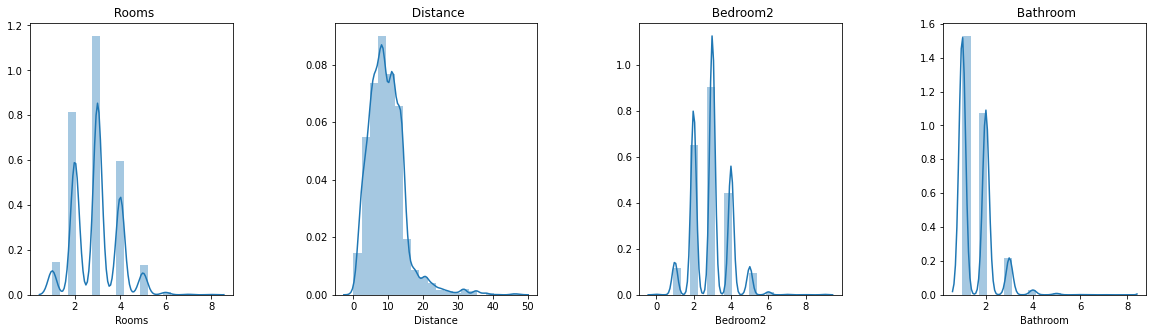

In [212]:
plt.figure(2, figsize = (20,5))
n = 0
for x in ['Rooms','Distance', 'Bedroom2', 'Bathroom']:
    n += 1
    plt.subplot(1, 4, n)
    plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
    sns.distplot(hs[x], bins = 20)
    plt.title(' {}'.format(x))
plt.show()

Dari segi distance atau jarak, wajar bagi mereka yang ingin berdekatan dengan tengah-tengah kota sehingga grafiknya sedikit right skewed

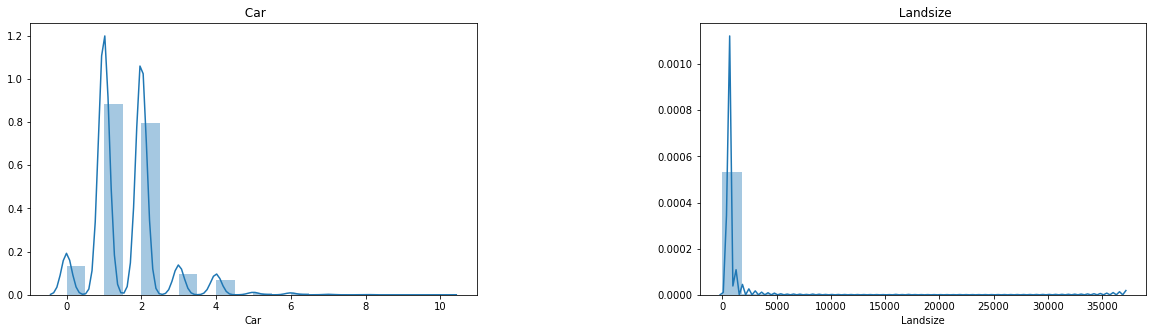

In [213]:
plt.figure(2, figsize = (20,5))
n = 0
for x in ['Car', 'Landsize']:
    n += 1
    plt.subplot(1, 2, n)
    plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
    sns.distplot(hs[x], bins = 20)
    plt.title(' {}'.format(x))
plt.show()

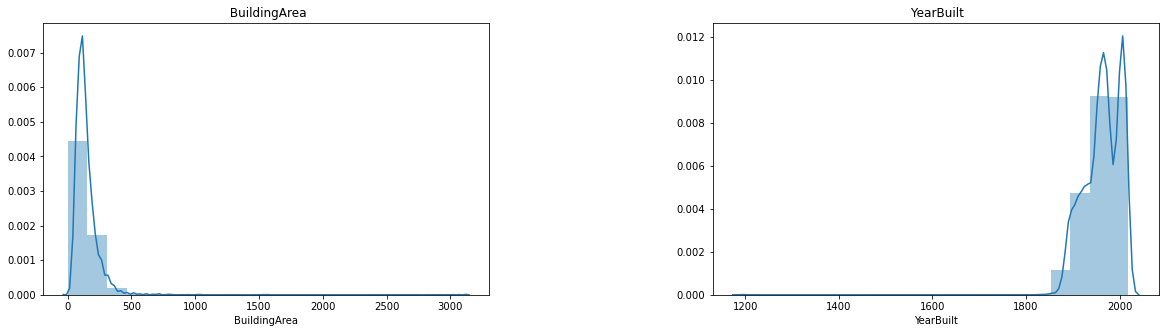

In [214]:
plt.figure(2, figsize = (20,5))
n = 0
for x in ['BuildingArea', 'YearBuilt']:
    n += 1
    plt.subplot(1, 2, n)
    plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
    sns.distplot(hs[x], bins = 20)
    plt.title(' {}'.format(x))
plt.show()

Terdapat data extreme dimana Yearbuilt bisa dari tahun 1200 (termasuk rumah bersejarah) namun wajar jika pergerakan pembangunan didominasi pada tahun 1900 ke atas dimana industrial age sudah mulai masuk (industri 2.0)

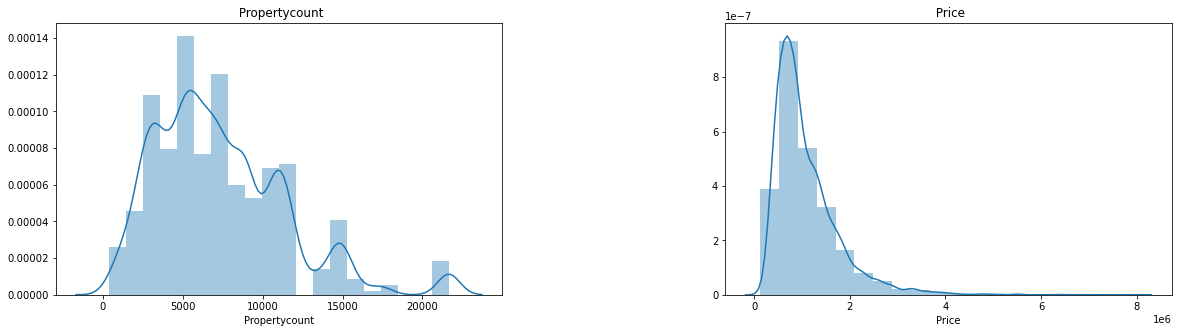

In [215]:
plt.figure(2, figsize = (20,5))
n = 0
for x in ['Propertycount','Price']:
    n += 1
    plt.subplot(1, 2, n)
    plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
    sns.distplot(hs[x], bins = 20)
    plt.title(' {}'.format(x))
plt.show()

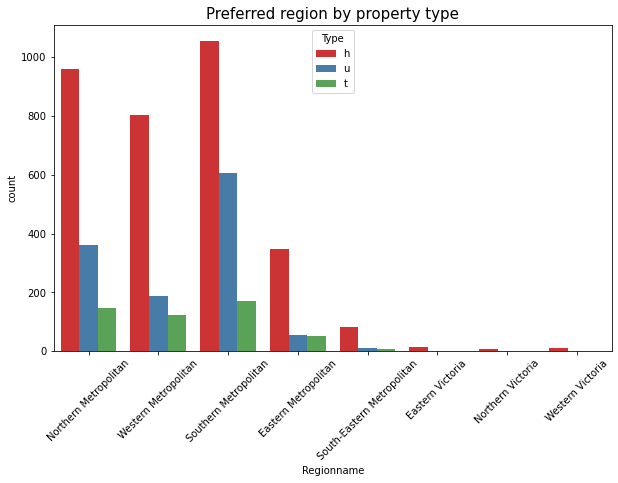

In [41]:
plt.figure(figsize=(10,6))
g=sns.countplot(hs['Regionname'],hue='Type',data=hs,palette='Set1')
g.set_xticklabels(g.get_xticklabels(), rotation=45)
g.set_title('Preferred region by property type',fontsize=15);

Text(0.5, 1.0, 'The number of properties in Council Area')

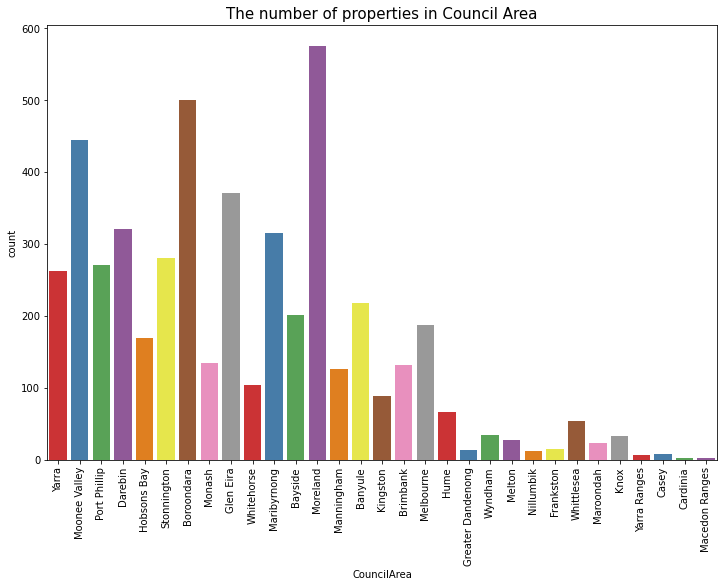

In [45]:
plt.figure(figsize=(12,8))
g=sns.countplot(hs['CouncilArea'],data=hs,palette='Set1')
g.set_xticklabels(g.get_xticklabels(), rotation=90)
g.set_title('The number of properties in Council Area',fontsize=15)

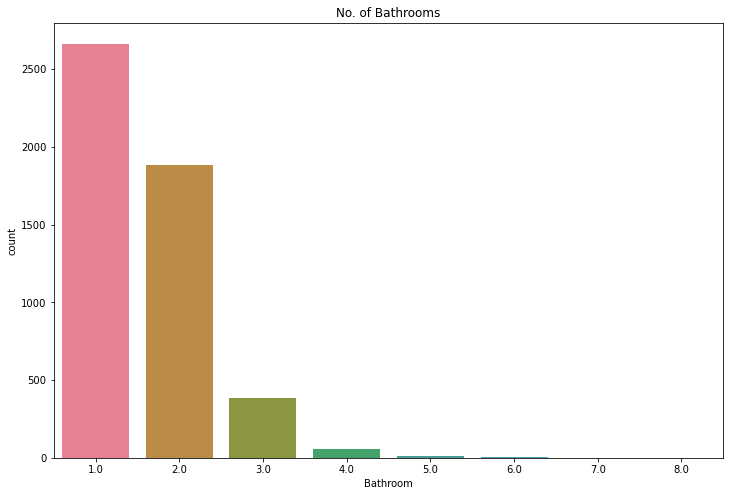

In [48]:
plt.figure(figsize=(12,8))

b = sns.countplot(hs['Bathroom'],palette='husl').set_title('No. of Bathrooms')

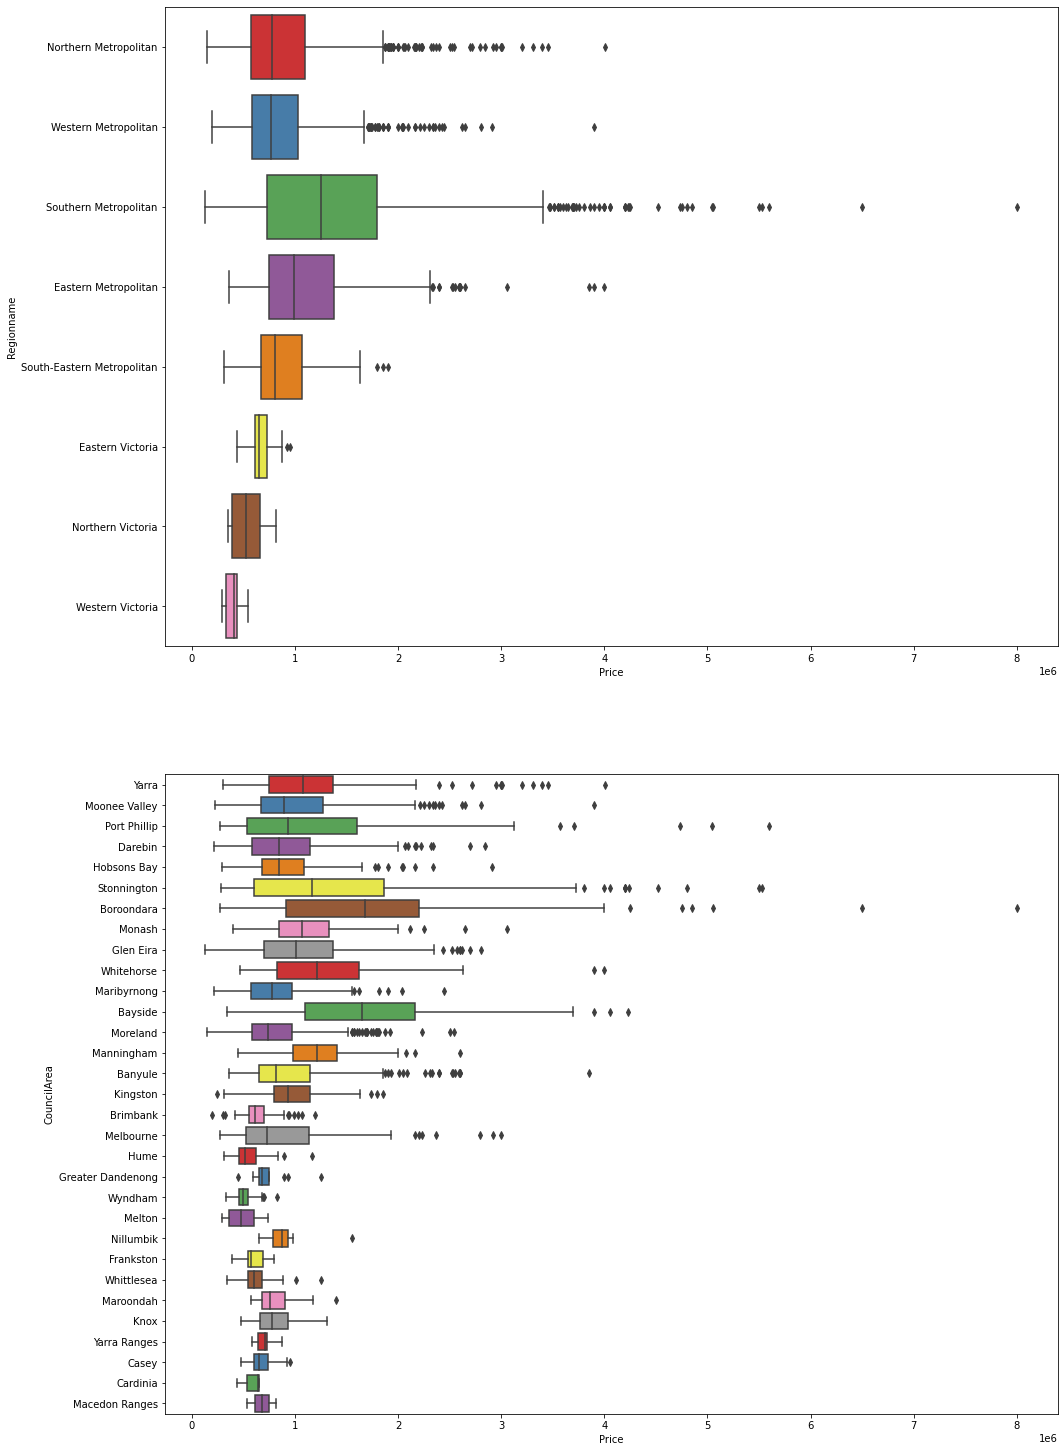

In [50]:
region_feature=['Regionname','CouncilArea']
plt.figure(figsize=(16,40))
i=1
for feature in region_feature:
    plt.subplot(3,1,i)
    sns.boxplot(y=hs[feature],x=hs['Price'],palette="Set1")
    plt.ylabel(feature)
    i+=1

Banyak pembeli yang lebih suka membeli di council area Borondara dan Stonington. Western Victoria termasuk range harga yang sangat kecil dibanding yang lain

Text(0.5, 1.0, 'Price with respect to no. of rooms')

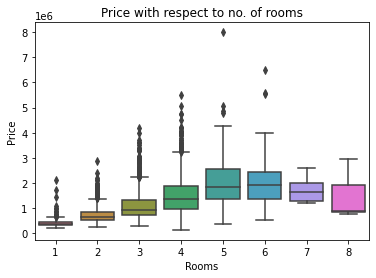

In [56]:
sns.boxplot(x=hs['Rooms'],y=hs['Price'],palette='husl').set_title('Price with respect to no. of rooms')

Kabanyakan dari rooms adalah antara 2-3 rooms, namun jika diperhatikan, terdapat outlier yang cukup banyak, dimana angka rooms 1-4 harganya banyak yang melebihi dari rata/IQR

In [59]:
hs.columns

Index(['Date', 'Day', 'Month', 'Year', 'Suburb', 'Address', 'Type', 'Rooms',
       'Method', 'SellerG', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom',
       'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea',
       'Lattitude', 'Longtitude', 'Regionname', 'Propertycount', 'Price'],
      dtype='object')

In [60]:
numerical_features = list(hs.select_dtypes(exclude = [object]))
print(len(numerical_features))

categorical_features = list(hs.select_dtypes(include = [object]))
print(len(categorical_features))

17
7


In [61]:
numerical_features

['Date',
 'Day',
 'Month',
 'Year',
 'Rooms',
 'Distance',
 'Postcode',
 'Bedroom2',
 'Bathroom',
 'Car',
 'Landsize',
 'BuildingArea',
 'YearBuilt',
 'Lattitude',
 'Longtitude',
 'Propertycount',
 'Price']

In [218]:
categorical_features =['Suburb', 'Type', 'Method', 'SellerG', 'CouncilArea', 'Regionname'] 
#untuk endoing, address dibuang karena unik setiap tempatnya

In [62]:
hs.columns

Index(['Date', 'Day', 'Month', 'Year', 'Suburb', 'Address', 'Type', 'Rooms',
       'Method', 'SellerG', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom',
       'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea',
       'Lattitude', 'Longtitude', 'Regionname', 'Propertycount', 'Price'],
      dtype='object')

In [168]:
hs[hs.describe().columns].corr().index

Index(['Day', 'Month', 'Year', 'Rooms', 'Distance', 'Postcode', 'Bedroom2',
       'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude',
       'Longtitude', 'Propertycount', 'Price'],
      dtype='object')

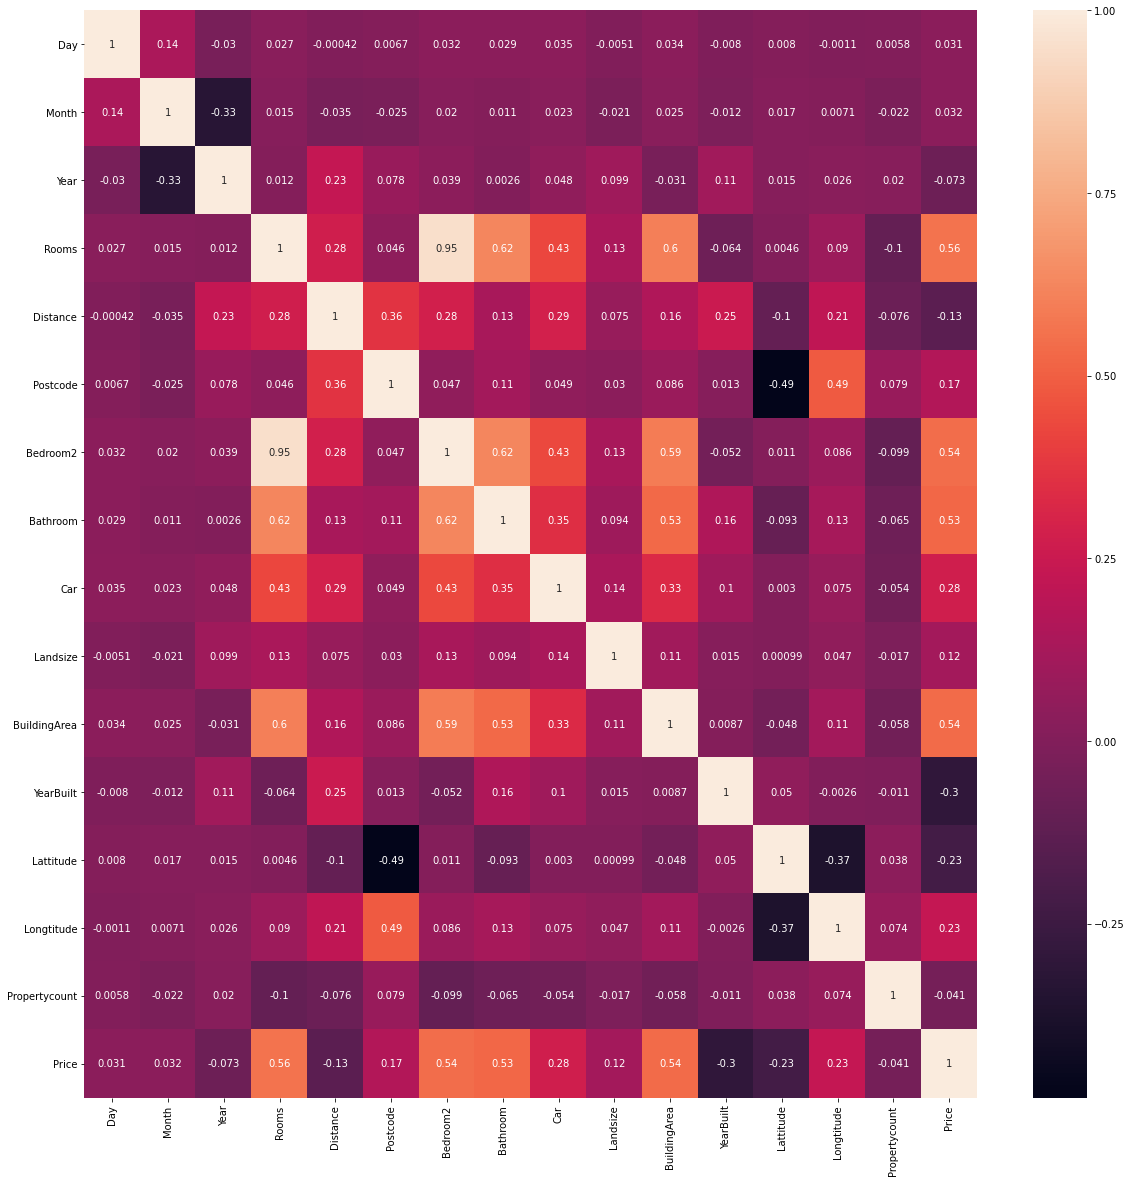

In [63]:
plt.figure(figsize=(20,20))

#plot heat map
a = sns.heatmap(hs.corr(),annot=True)

Dari heatmap corr atas, feature yang cukup mempengaruhi target price adalah: 
1. Rooms
2. Bedrooms2
3. Bathroom
4. BuildingArea
5. Car (berapa mobil yang muat untuk perumahan tersebut)
6. YearBuilt (negative correlation)

Aspek/feature di atas sering dijadikan patokan untuk mencari tempat tinggal dimana sering kali pembeli menanyakan:
1. Berapa kamarnya?
2. Kamar tidurnya berapa?
3. Kamar mandinya berapa?
4. Luas bangunan berapa?
5. Ada parkiran?
6. Rumahnya dibangun kapan ya?

### Encode categorical data

In [64]:
hs_encode = pd.get_dummies(hs, prefix=categorical_features, columns= categorical_features)

In [66]:
hs_encode

Date  Day  Month  Year  Rooms  Distance  Postcode  Bedroom2  \
1     2016-04-02  5    4      2016  2      2.5       3067.0    2.0        
2     2017-04-03  0    4      2017  3      2.5       3067.0    3.0        
4     2016-04-06  2    4      2016  4      2.5       3067.0    3.0        
6     2016-07-05  1    7      2016  3      2.5       3067.0    4.0        
7     2016-08-10  2    8      2016  2      2.5       3067.0    2.0        
...          ... ..   ..       ... ..      ...          ...    ...        
6094  2016-07-26  1    7      2016  3      13.5      3020.0    3.0        
10527 2017-05-27  5    5      2017  5      10.2      3127.0    5.0        
6698  2016-09-24  5    9      2016  3      7.0       3013.0    3.0        
9516  2017-06-17  5    6      2017  4      18.0      3095.0    4.0        
6539  2017-02-25  5    2      2017  3      8.0       3016.0    3.0        

       Bathroom  Car  Landsize  BuildingArea  YearBuilt  Lattitude  \
1      1.0       0.0  156.0     79.00         1900.0    -37.80790    
2      2.0       0.0  134.0     150.00        1900.0    -37.80930    
4      1.0       2.0  120.0     142.00        2014.0    -37.80720    
6      2.0       0.0  245.0     210.00        1910.0    -37.80240    
7      1.0       2.0  256.0     107.00        1890.0    -37.80600    
...    ...       ...    ...        ...           ...          ...    
6094   1.0       1.0  694.0     155.00        1960.0    -37.78940    
10527  2.0       0.0  739.0     266.53        1927.0    -37.81708    
6698   2.0       2.0  206.0     173.00        2006.0    -37.81270    
9516   2.0       3.0  1004.0    184.00        1985.0    -37.69999    
6539   1.0       0.0  249.0     85.00         1910.0    -37.86000    

       Longtitude  Propertycount      Price  Suburb_Abbotsford  \
1      144.99340   4019.0         1035000.0  1                   
2      144.99440   4019.0         1465000.0  1                   
4      144.99410   4019.0         1600000.0  1                   
6      144.99930   4019.0         1876000.0  1                   
7      144.99540   4019.0         1636000.0  1                   
...          ...      ...               ... ..                   
6094   144.80270   6763.0         682000.0   0                   
10527  145.09566   5457.0         2505000.0  0                   
6698   144.89650   6543.0         955000.0   0                   
9516   145.16170   6990.0         977500.0   0                   
6539   144.89500   6380.0         1210000.0  0                   

       Suburb_Aberfeldie  Suburb_Airport West  Suburb_Albert Park  \
1      0                  0                    0                    
2      0                  0                    0                    
4      0                  0                    0                    
6      0                  0                    0                    
7      0                  0                    0                    
...   ..                 ..                   ..                    
6094   0                  0                    0                    
10527  0                  0                    0                    
6698   0                  0                    0                    
9516   0                  0                    0                    
6539   0                  0                    0                    

       Suburb_Albion  Suburb_Alphington  Suburb_Altona  Suburb_Altona Meadows  \
1      0              0                  0              0                       
2      0              0                  0              0                       
4      0              0                  0              0                       
6      0              0                  0              0                       
7      0              0                  0              0                       
...   ..             ..                 ..             ..                       
6094   0              0                  0              0                       


In [223]:
hs_encode.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 1 to 10683
Columns: 526 entries, Date to Regionname_Western Victoria
dtypes: datetime64[ns](1), float64(12), int64(4), object(1), uint8(508)
memory usage: 3.1+ MB


In [69]:
x1 = hs_encode.drop(['Date','Longtitude', 'Lattitude', 'Price', 'Postcode'], axis=1)
y1 = hs_encode['Price']

### Split the dataset

In [70]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size = .2, random_state=42)
#splitting the data 80% train, 20% Test

### Linear Regression

In [71]:
regressor = LinearRegression()  
regressor.fit(x1_train, y1_train)

y1_pred = regressor.predict(x1_test)

print('MAE Linear Regression:', metrics.mean_absolute_error(y1_test, y1_pred))  
print('MSE Linear Regression:', metrics.mean_squared_error(y1_test, y1_pred))  
print('RMSE Linear Regression:', np.sqrt(metrics.mean_squared_error(y1_test, y1_pred)))
print("R2 Score Linear Regression:", round(metrics.r2_score(y1_test, y1_pred), 2))


RMSE_reg = np.sqrt(metrics.mean_squared_error(y1_test, y1_pred))
MAE_reg = metrics.mean_absolute_error(y1_test, y1_pred)

mean_target = hs_encode['Price'].mean()

print('Percentage of Error by RMSE', round(RMSE_reg / mean_target * 100, 2), '%')
print('Percentage of Error by MAE', round(MAE_reg / mean_target * 100, 2), '%')

MAE Linear Regression: 4536030428.468834
MSE Linear Regression: 4.287505150900654e+19
RMSE Linear Regression: 6547904360.099233
R2 Score Linear Regression: -99802058.79
Percentage of Error by RMSE 605647.47 %
Percentage of Error by MAE 419559.48 %


# Ridge, Lasso dan ElasticNet

In [72]:
modelA = Ridge()
modelB = Lasso()
modelC = ElasticNet()

modelA.fit(x1_train, y1_train)
modelB.fit(x1_train, y1_train)
modelC.fit(x1_train, y1_train)



modelA_pred_y = modelA.predict(x1_test)
modelB_pred_y = modelB.predict(x1_test)
modelC_pred_y = modelC.predict(x1_test)

MAE_Ridge = metrics.mean_absolute_error(y1_test, modelA_pred_y)
MSE_Ridge = metrics.mean_squared_error(y1_test, modelA_pred_y)
RMSE_Ridge = np.sqrt(metrics.mean_squared_error(y1_test, modelA_pred_y))
R2_Ridge = round(metrics.r2_score(y1_test, modelA_pred_y),2)
Percent_error_RMSE_Ridge = round(RMSE_Ridge / mean_target * 100, 2)
Percent_error_MAE_Ridge = round(MAE_Ridge / mean_target * 100, 2)

print('MAE Ridge:', MAE_Ridge)  
print('MSE Ridge:', MSE_Ridge)  
print('RMSE Ridge:', RMSE_Ridge)
print("R2 Ridge:", R2_Ridge)
print('Percentage of Error by RMSE Ridge', Percent_error_RMSE_Ridge, '%')
print('Percentage of Error by MAE Ridge', Percent_error_MAE_Ridge, '%')

#Lasso
MAE_Lasso = metrics.mean_absolute_error(y1_test, modelB_pred_y)
MSE_Lasso  = metrics.mean_squared_error(y1_test, modelB_pred_y)
RMSE_Lasso  = np.sqrt(metrics.mean_squared_error(y1_test, modelB_pred_y))
R2_Lasso  = round(metrics.r2_score(y1_test, modelB_pred_y),2)
Percent_error_RMSE_Lasso  = round(RMSE_Lasso / mean_target * 100, 2)
Percent_error_MAE_Lasso  = round(MAE_Lasso / mean_target * 100, 2)

print('MAE Lasso:', MAE_Lasso)  
print('MSE Lasso:', MSE_Lasso)  
print('RMSE Lasso:', RMSE_Lasso)
print("R2 Lasso:", R2_Lasso)
print('Percentage of Error by RMSE Lasso', Percent_error_RMSE_Lasso, '%')
print('Percentage of Error by MAE Lasso', Percent_error_MAE_Lasso, '%')

#ElasticNet
MAE_ElasticNet = metrics.mean_absolute_error(y1_test, modelC_pred_y)
MSE_ElasticNet  = metrics.mean_squared_error(y1_test, modelC_pred_y)
RMSE_ElasticNet  = np.sqrt(metrics.mean_squared_error(y1_test, modelC_pred_y))
R2_ElasticNet  = round(metrics.r2_score(y1_test, modelC_pred_y),2)
Percent_error_RMSE_ElasticNet  = round(RMSE_ElasticNet / mean_target * 100, 2)
Percent_error_MAE_ElasticNet  = round(MAE_ElasticNet / mean_target * 100, 2)

print('MAE Lasso:', MAE_ElasticNet)  
print('MSE Lasso:', MSE_ElasticNet)  
print('RMSE Lasso:', RMSE_ElasticNet)
print("R2 Lasso:", R2_ElasticNet)
print('Percentage of Error by RMSE ElasticNet', Percent_error_RMSE_ElasticNet, '%')
print('Percentage of Error by MAE ElasticNet', Percent_error_MAE_ElasticNet, '%')

C:\Users\Azizur Rachman\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3423480673948.284, tolerance: 179873645735.02856
  positive)


MAE Ridge: 225906.22363620644
MSE Ridge: 104320529035.66833
RMSE Ridge: 322986.8867859318
R2 Ridge: 0.76
Percentage of Error by RMSE Ridge 29.87 %
Percentage of Error by MAE Ridge 20.9 %
MAE Lasso: 219410.70313869588
MSE Lasso: 112491088713.39116
RMSE Lasso: 335396.9122001441
R2 Lasso: 0.74
Percentage of Error by RMSE Lasso 31.02 %
Percentage of Error by MAE Lasso 20.29 %
MAE Lasso: 267337.81566009583
MSE Lasso: 153079349048.1244
RMSE Lasso: 391253.561067659
R2 Lasso: 0.64
Percentage of Error by RMSE ElasticNet 36.19 %
Percentage of Error by MAE ElasticNet 24.73 %


In [73]:
DT_model= DecisionTreeRegressor(random_state=42)
DT_model.fit(x1_train, y1_train)
y_pred_DT = DT_model.predict(x1_test)



MAE_DT = metrics.mean_absolute_error(y1_test, y_pred_DT)
MSE_DT  = metrics.mean_squared_error(y1_test, y_pred_DT)
RMSE_DT  = np.sqrt(metrics.mean_squared_error(y1_test, y_pred_DT))
R2_DT  = round(metrics.r2_score(y1_test, y_pred_DT),2)
Percent_error_RMSE_DT  = round(RMSE_DT / mean_target * 100, 2)
Percent_error_MAE_DT  = round(MAE_DT / mean_target * 100, 2)

print('MAE Decision Tree:', MAE_DT)  
print('MSE Decision Tree:', MSE_DT)  
print('RMSE Decision Tree:', RMSE_DT)
print("R2 Decision Tree:", R2_DT)
print('Percentage of Error by RMSE Decision Tree', Percent_error_RMSE_DT, '%')
print('Percentage of Error by MAE Decision Tree', Percent_error_MAE_DT, '%')


MAE Decision Tree: 240733.417
MSE Decision Tree: 144132196897.577
RMSE Decision Tree: 379647.4639683202
R2 Decision Tree: 0.66
Percentage of Error by RMSE Decision Tree 35.12 %
Percentage of Error by MAE Decision Tree 22.27 %


In [74]:
RF_model= RandomForestRegressor(random_state=42)
RF_model.fit(x1_train, y1_train)
y_pred_RF = RF_model.predict(x1_test)



MAE_RF = metrics.mean_absolute_error(y1_test, y_pred_RF)
MSE_RF  = metrics.mean_squared_error(y1_test, y_pred_RF)
RMSE_RF  = np.sqrt(metrics.mean_squared_error(y1_test, y_pred_RF))
R2_RF  = round(metrics.r2_score(y1_test, y_pred_RF),2)
Percent_error_RMSE_RF  = round(RMSE_RF / mean_target * 100, 2)
Percent_error_MAE_RF  = round(MAE_RF / mean_target * 100, 2)

print('MAE Random Forest:', MAE_RF)  
print('MSE Random Forest:', MSE_RF)  
print('RMSE Random Forest:', RMSE_RF)
print("R2 Random Forest:", R2_RF)
print('Percentage of Error by RMSE Random Forest', Percent_error_RMSE_RF, '%')
print('Percentage of Error by MAE Random Forest', Percent_error_MAE_RF, '%')


MAE Random Forest: 166994.22427000004
MSE Random Forest: 65875339079.95451
RMSE Random Forest: 256661.91591265448
R2 Random Forest: 0.85
Percentage of Error by RMSE Random Forest 23.74 %
Percentage of Error by MAE Random Forest 15.45 %


Dari semua model yang diexecute, error yang paling rendah adalah random forest regressor dengan value sebagai berikut:
- Percentage of Error by RMSE Random Forest 24.81 %
- Percentage of Error by MAE Random Forest 15.98 %

In [79]:
RF_parameter_random = {
    'max_depth' : [None, 10, 20, 40, 80, 100, 200, 400],
    'min_samples_split' : [2, 3, 4, 5, 6, 7, 8, 9, 10],
    'min_samples_leaf' : [1, 2, 3, 4, 5, 6, 7, 8, 9],
    'n_estimators' : [10, 20, 40, 80, 100, 200, 400, 1000]
}



### from stack overflow:
"This parameter is used to specify how many concurrent processes or threads should be used for routines that are parallelized with joblib.

n_jobs is an integer, specifying the maximum number of concurrently running workers. If 1 is given, no joblib parallelism is used at all, which is useful for debugging. If set to -1, all CPUs are used. For n_jobs below -1, (n_cpus + 1 + n_jobs) are used. For example with n_jobs=-2, all CPUs but one are used.

n_jobs is None by default, which means unset; it will generally be interpreted as n_jobs=1, unless the current joblib.Parallel backend context specifies otherwise."

In [80]:
%%time
rfc_random = RandomizedSearchCV(estimator = RF_model,
                             param_distributions = RF_parameter_random,
                             cv =5,
                             n_iter=10, #change to 100 (default 10)
                             n_jobs=-1
                            )

rfc_random.fit(x1_train, y1_train)

Wall time: 8min 49s


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [81]:
rfc_random.best_params_

{'n_estimators': 200,
 'min_samples_split': 3,
 'min_samples_leaf': 1,
 'max_depth': 20}

In [83]:
RF_model_hyper = RandomForestRegressor(n_estimators = 200, min_samples_split = 3, min_samples_leaf = 1, max_depth = 20,random_state=42)
RF_model_hyper.fit(x1_train, y1_train)
y_pred_RF_hyper = RF_model_hyper.predict(x1_test)



MAE_RF_hyper = metrics.mean_absolute_error(y1_test, y_pred_RF_hyper)
MSE_RF_hyper  = metrics.mean_squared_error(y1_test, y_pred_RF_hyper)
RMSE_RF_hyper  = np.sqrt(metrics.mean_squared_error(y1_test, y_pred_RF_hyper))
R2_RF_hyper  = round(metrics.r2_score(y1_test, y_pred_RF_hyper),2)
Percent_error_RMSE_RF_hyper  = round(RMSE_RF_hyper / mean_target * 100, 2)
Percent_error_MAE_RF_hyper  = round(MAE_RF_hyper / mean_target * 100, 2)

print('MAE Random Forest:', MAE_RF_hyper)  
print('MSE Random Forest:', MSE_RF_hyper)  
print('RMSE Random Forest:', RMSE_RF_hyper)
print("R2 Random Forest:", R2_RF_hyper)
print('Percentage of Error by RMSE Random Forest', Percent_error_RMSE_RF_hyper, '%')
print('Percentage of Error by MAE Random Forest', Percent_error_MAE_RF_hyper, '%')

MAE Random Forest: 166733.16320490546
MSE Random Forest: 66206405717.85719
RMSE Random Forest: 257306.05456898443
R2 Random Forest: 0.85
Percentage of Error by RMSE Random Forest 23.8 %
Percentage of Error by MAE Random Forest 15.42 %


### Model Evaluation

Setelah melakukan 6 model yaitu:
1. Linear Regression
2. Ridge
3. Lasso
4. ElasticNet 
5. DecisionTree Regression
6. Random Forest Regression

Random forest memiliki model dengan error yang cukup rendah dibanding yang lain yakni: 

Percentage of Error by RMSE Random Forest 24.81 %
Percentage of Error by MAE Random Forest 15.98 %

In [76]:
eval_ = pd.DataFrame({'Actual': y1_test, 'Predicted': y_pred_RF})
eval_

Actual  Predicted
2698   747000.0   879547.0 
4694   650000.0   913550.0 
4814   710000.0   975897.5 
1940   766000.0   979970.0 
1316   1261000.0  1056660.0
...          ...        ...
10137  667000.0   665315.0 
4188   1191000.0  1315535.0
9098   1240000.0  1183225.0
4996   890000.0   760225.0 
3494   601200.0   710630.0 

[1000 rows x 2 columns]

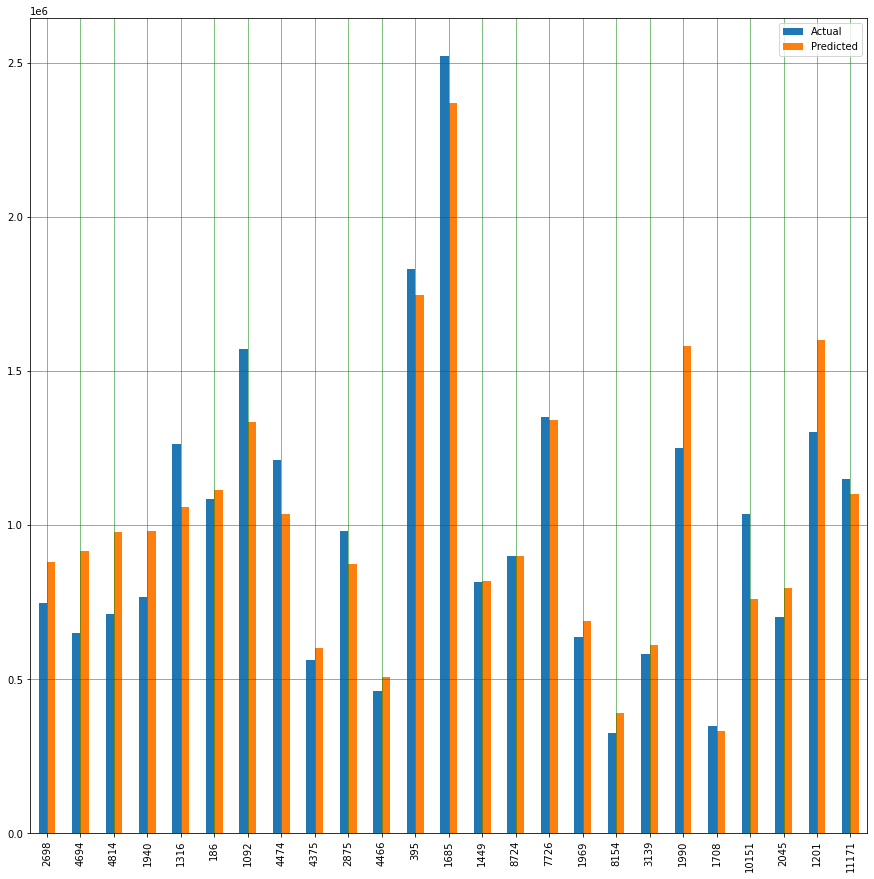

In [78]:
eval1 = eval_.head(25)
eval1.plot(kind = 'bar', figsize = (15, 15))
plt.grid(which = 'major', linestyle = '-', linewidth = '0.5', color = 'green')
plt.grid(which = 'minor', linestyle = '-', linewidth = '0.5', color = 'black')
plt.show()

Dari grafik atas, dapat disimpulkan bahwa terdapat:
1. 14 data row index prediksi melebihi dari actual
2. 11 data row index data prediksi lebih rendah dari actual



Kesimpulan:

- Atas modeling harga rumah, agar tidak salah memprediksi, jangan sampai price actual lebih mahal dari prediksi, mengingat bahwa, jika Machine learning memprediksi nilai harga rumah lebih tinggi dari actual, penjual akan diuntungkan, namun jika sebaliknya, pembeli yang akan diuntungkan 

- Saat melalukan randomsearch untuk tuning random forest regressor agar lebih baik, performa komputer tidak dapat mengeksekusi on time (kelamaan) sehingga kesimpulan yang diambil hanya berdasarkan model awal unscaled data.Bila waktu memadai, akan dilalukan scaling (robust) data dikarenakan terdapat outlier yang cukup banyak dan akan ditest kembali pada 6 model tersebut. 

- Pada saat testing, terdeteksi bahwa feature yang diambil terlampau banyak (efek dari onehot encoding/dummy variable dikarenakan untuk menghindari terjadinya ordinal varible (jika menggunakan label encoder). Next, hanya menggunakan feature dari corr (Rooms, Bedrooms2, Bathroom, BuildingArea, Car (berapa mobil yang muat untuk perumahan tersebut), YearBuilt (negative correlation))mungkin dapat memperbaiki hasil model

- Di sisa waktu akhir, hyper tuning berhasil menaikan performa (error berkurang dari sebelumnya)

- MAE Random Forest: 166733.16320490546
- MSE Random Forest: 66206405717.85719
- RMSE Random Forest: 257306.05456898443
- R2 Random Forest: 0.85
- Percentage of Error by RMSE Random Forest hyper: 23.8 %
- Percentage of Error by MAE Random Forest hyper :15.42 %
